In [1]:
%matplotlib inline

# initialization
from rayoptics.environment import *

In [2]:
double_lens_model = OpticalModel()
sm = double_lens_model['seq_model']
osp = double_lens_model['optical_spec']
pm = double_lens_model['parax_model']
em = double_lens_model['ele_model']
pt = double_lens_model['part_tree']

sm.do_apertures = False

# Put obj at infinity (very far away)
sm.gaps[0].thi = 1e10

sm.list_model()


              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      1.0000
  Img:     0.000000      0.00000                       1      1.0000


In [3]:
osp.pupil.value=8.0
listobj(osp['pupil'])
double_lens_model.update_model()

aperture: object epd; value=8.0



In [4]:
# Add converging lens
double_lens_model.add_from_file("../data/codv_16960.seq", t=11.5)
sm.list_model()
pt.list_model()
double_lens_model.update_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      1.0000
    1:     0.049677      9.85724     N-SF6             1      12.500
    2:     0.000000      11.5000       air             1      12.500
  Img:     0.000000      0.00000                       1      1.0000
root
├── Object
├── E1
└── Image


In [5]:
# Add diverging lens
double_lens_model.add_from_file("../data/CODV_45015.seq", t=28)
sm.list_model()
pt.list_model()
#div_lens = pt.obj_by_name('E2')
#double_lens_model.flip(div_lens)
double_lens_model.update_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+10       air             1      1.0000
    1:     0.049677      9.85724     N-SF6             1      12.500
    2:     0.000000      11.5000       air             1      12.500
45015:    -0.106157      2.20000    N-SF11             1      5.5000
    4:     0.000000      28.0000       air             1      1.0000
  Img:     0.000000      0.00000                       1      1.0000
root
├── Object
├── E1
├── E2
└── Image


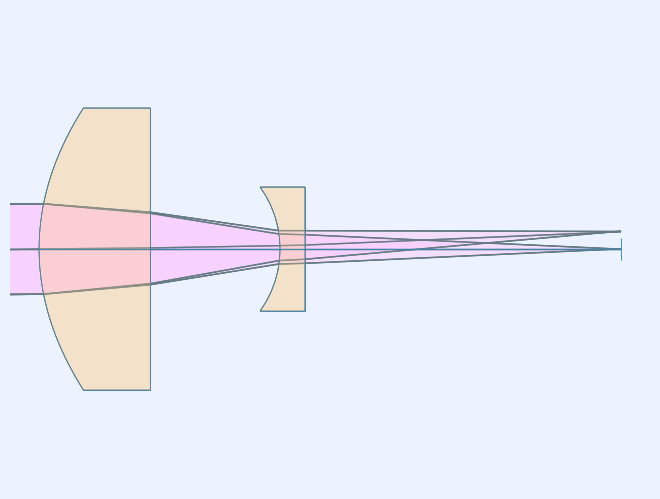

In [6]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=double_lens_model,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [7]:
pm.first_order_data()

efl               75.71
f                 75.71
f'                75.71
ffl              -182.7
pp1                -107
bfl               23.11
ppk              -52.59
pp sep            77.93
f/#               9.463
m            -7.571e-09
red          -1.321e+08
obj_dist          1e+10
obj_ang               1
enp_dist             -0
enp_radius            4
na obj            4e-10
n obj                 1
img_dist          23.11
img_ht            1.321
exp_dist         -13.15
exp_radius        1.658
na img         -0.05284
n img                 1
optical invariant      0.06982


In [8]:
total_distance = sum(gap.thi for gap in sm.gaps)
print(f"Total distance from object to image: {total_distance}")

optic_stack_length = sum(gap.thi for gap in sm.gaps[1:])
print(f"Total length of the optic stack from the front lens to the image plane: {optic_stack_length}")

Total distance from object to image: 10000000051.557241
Total length of the optic stack from the front lens to the image plane: 51.55724134245759
